### 생선 분류 - 최적의 K 찾기 : 하이퍼 파라미터
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘 : 최근접이웃알고리즘
- 하이퍼파라미터 튜닝 : 모델 성능 개선

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE = '../Data/fish.csv'

In [3]:
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(2)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3


In [4]:
mask = (fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')
twoDF = fishDF[mask]
twoDF.head(2)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3


In [5]:
twoDF.reset_index(drop=True, inplace=True)

In [6]:
# Species 컬럼을 수치화 => Bream: 0, Smelt: 1
twoDF['fishcode'] = twoDF.Species.replace({'Bream': 0, 'Smelt': 1})

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_13008\4063027218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['fishcode'] = twoDF.Species.replace({'Bream': 0, 'Smelt': 1})


[2] 피처와 타겟 분리

In [7]:
features = twoDF[['Weight','Length']]
target = twoDF['fishcode']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

feature => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    train_size=0.8,
                                                    stratify=target,
                                                    random_state=10)

print(f'x_train: {x_train.shape}, {x_train.ndim}D')
print(f'y_train: {y_train.shape}, {y_train.ndim}D')

print(f'x_test: {x_test.shape}, {x_test.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')

x_train: (39, 2), 2D
y_train: (39,), 1D
x_test: (10, 2), 2D
y_test: (10,), 1D


[3-2] 피쳐 스케일링

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [12]:
# 스케일러 데이터셋에 속성값 설정
mmScaler.fit(x_train)

MinMaxScaler()

In [13]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_train_scaled = mmScaler.transform(x_train)

In [14]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
x_test_scaled=mmScaler.transform(x_test)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [17]:
# 스케일링 진행
model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [18]:
model.score(x_test_scaled, y_test)

1.0

[6] 최적의 K 개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
- 하이퍼파라미터

In [19]:
# K의 범위 : 1 ~ 전체 데이터 개수

scores, points = [], []
for k in range(1, 40):
    
    # 최근접 이웃 데이터 수 설정
    model.n_neighbors=k

    # 점수 계산
    jumsu = model.score(x_test_scaled, y_test)

    if k>1:
        if jumsu != scores[-1]: points.append(k)
    scores.append(jumsu)
points

[22]

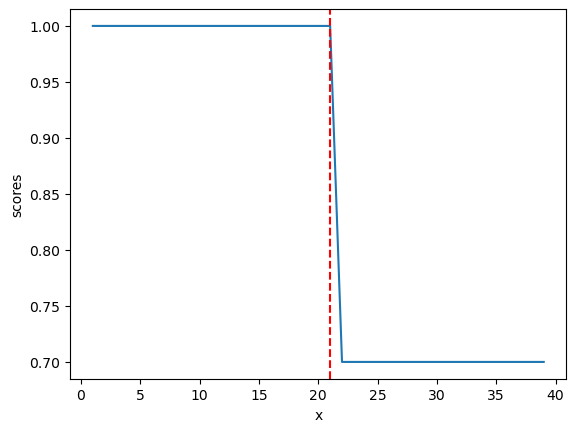

In [20]:
# x축 k, y축 점수
plt.plot(range(1,40), scores)
plt.xlabel('x')
plt.ylabel('scores')
plt.axvline(points[0]-1, 0.0, 1.0, color='r', linestyle='dashed')
plt.show()